In [17]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
import matplotlib.pyplot as plt

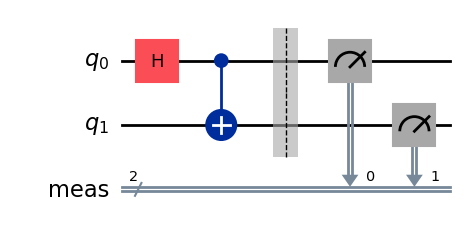

In [18]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl')
plt.show()

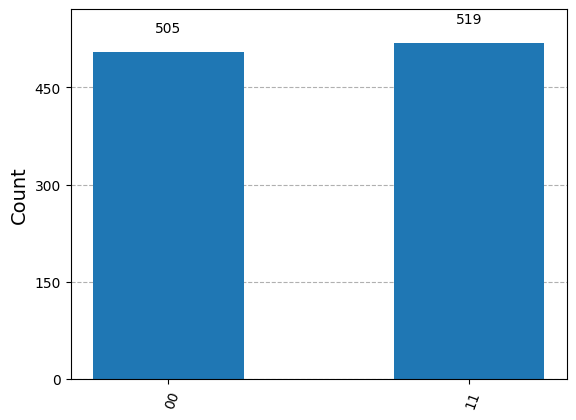

In [19]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())
plt.show()

In [20]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#service = QiskitRuntimeService(channel='ibm_quantum', token='YOUR_IBM_QUANTUM_CLOUD_API_KEY')
service = QiskitRuntimeService(channel='ibm_quantum', token='0c66e11441d98f0444d55bec0650f6a92bc7ac016baa258aa1343b8152f13fb0a10ea612064381ae3b411e78f90c8c763a1545aa5400278ed3d6e49822b929b0')

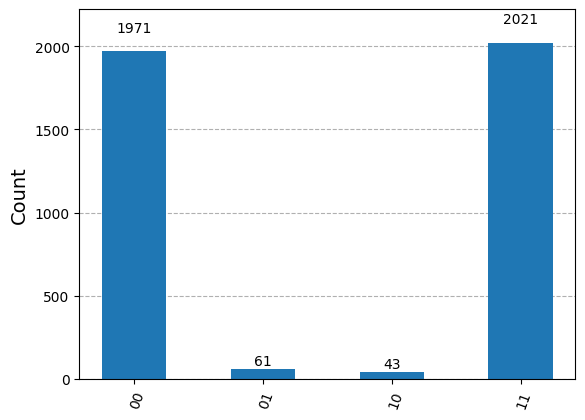

In [22]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
qcomp = service.least_busy(operational=True, simulator=False) # select least busy quantum computer

pm = generate_preset_pass_manager(backend=qcomp, optimization_level=1) # optimize the circuit for quantum execution
isa_circuit = pm.run(circuit) # modify circuit for qcomp's specific Instruction Set Architecture (ISA)

sampler = Sampler(qcomp)
job = sampler.run([isa_circuit])
result = job.result()
plot_histogram(result[0].data.meas.get_counts())
plt.show()
# NOTE: This may take a while... You can check job status on the IBM Quantum Platform web dashboard.